<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-06-tree-based-models-bagging-quantile-classifier-forest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 2.6 Random Forests Quantile Classifier (RFQ)

The Random Forests Quantile Classifier (RFQ) is a machine learning method designed to address class imbalance problems in classification tasks. It extends the concept of quantile classifiers (`q-classifiers`) by introducing a `*q-classifier*`, which is implemented using random forests. RFQ is particularly effective for datasets where one class (the minority class) is significantly underrepresented compared to the other (the majority class).

## Overview

RFQ is a classification algorithm that assigns a sample to the minority class if the estimated conditional probability of the minority class exceeds a quantile threshold q*, where q* is set to the unconditional probability of observing a minority class sample (denoted as π). This threshold is estimated empirically using the relative frequency of minority class labels in the dataset. RFQ leverages the ensemble power of random forests to estimate these probabilities and make classification decisions, optimizing performance metrics suited for imbalanced data.



### Key Features

1. **Handles Imbalance**: Optimizes `G-mean` (√(TPR × TNR)) for rare minority classes.
2. **Random Forests**: Robust ensemble with configurable parameters (e.g., `ntree`, `mtry`).
3. **G-mean Importance**: Tailored variable importance for imbalanced data.
4. **Efficient**: Uses full dataset, unlike balanced sampling methods.
5. **Competitive**: Outperforms or matches methods like BRF, especially in high-dimensional, highly imbalanced settings.
6. **Empirical Threshold**: Estimates `q` as the minority class frequency.


### Understanding Imbalanced Data

Imbalanced data is common in real-world classification problems, such as detecting rare diseases or fraudulent transactions. The imbalance ratio (IR) quantifies this issue, defined as:

$$ \text{IR} = \frac{N_0}{N_1}, $$

where $N_0$ is the number of majority class samples, and $N_1$ is the number of minority class samples. A dataset is considered imbalanced when $\text{IR} > 1$.  

Standard Random Forest (RF) classifiers often struggle with imbalanced data because they rely on the Bayes rule, which minimizes overall misclassification error:

$$ \delta_{\text{B}}(x) = \mathbb{I}\{p(x) \geq 0.5\}, $$


where $p(x) = \mathbb{P}\{Y = 1 \mid X = x\}$ is the probability of the minority class (label 1) given features $x$. In imbalanced datasets, $p(x)$ is typically small, causing the classifier to predominantly predict the majority class, resulting in poor performance on the minority class.


### How RFQ Works

The RFQ classifier extends the Random Forest framework to better handle imbalanced data by estimating conditional quantiles of the response variable, focusing on the minority class. Unlike standard RF, which aggregates predictions via majority voting or averaging, RFQ leverages the full distribution of class probabilities across trees to provide more nuanced predictions. Below are the key steps, with equations, explaining how RFQ operates:

1.  Bootstrap Sampling and Tree Construction:

    -   RFQ builds a forest of $B$ decision trees, each trained on a bootstrap sample of the dataset, typically with replacement. At each node, a random subset of features is considered for splitting, using a criterion like Gini impurity, adjusted for class imbalance.

    -   For a given tree $b$, observations falling into a leaf node are retained, along with their class labels $\{Y_i : X_i \in \text{leaf}_b(x)\}$.

2.  Weight Assignment:

    -   For a new input $x$, RFQ assigns weights to each training observation based on its presence in the leaf nodes across all trees:

$$ w_i(x) = \frac{1}{B} \sum_{b=1}^B \mathbb{I}\{X_i \in \text{leaf}_b(x)\},$$

where $\mathbb{I}\{\cdot\}$ is an indicator function (1 if $X_i$ is in the leaf node of tree $b$ containing $x$, 0 otherwise).

3.  Estimating Conditional Class Probabilities:

    -   RFQ estimates the conditional probability of the minority class (label 1) given $x$:

$$ \hat{p}(x) = \sum_{i=1}^n w_i(x) \mathbb{I}\{Y_i = 1\},$$

where $\hat{p}(x)$ approximates $\mathbb{P}\{Y = 1 \mid X = x\}$ This is equivalent to estimating the conditional cumulative distribution function (CDF) for the class probabilities.

4.  Quantile-Based Classification:

    -   Instead of using a fixed threshold (e.g., 0.5 in Bayes rule), RFQ estimates quantiles of the conditional probability distribution. For a quantile $\tau \in (0,1)$, the classifier identifies the threshold $q_\tau(x)$ such that:

$$ \hat{F}(q | x) = \sum_{i=1}^n w_i(x) \mathbb{I}\{p_i \leq q\} \geq \tau, $$ where $p_i$ is the class probability for observation $i$. The classification rule becomes:

$$ \hat{Y}(x) = \mathbb{I}\{\hat{p}(x) \geq q_\tau(x)\},$$ allowing flexible thresholding to prioritize the minority class.

5.  Handling Imbalance:

    -   RFQ incorporates techniques to address imbalance, such as:

    -   `Cost-Sensitive Learning`: Assigning higher weights to the minority class in the Gini splitting criterion and terminal node voting. For example, if $w_1$ is the weight for the minority class and $w_0$ for the majority class $w_1 > w_0$, the weighted Gini impurity for a node is:

$$ \text{Gini} = 1 - \sum_{k=0}^1 \left( \frac{w_k \cdot n_k}{w_0 \cdot n_0 + w_1 \cdot n_1} \right)^2,$$ where $n_k$ is the number of samples of class ( k ) in the node.

-   `Balanced Sampling`: Using stratified bootstrap sampling or oversampling the minority class during tree construction to ensure more balanced datasets for each tree.

6.  Variable Importance (VIMP):

    -   RFQ uses a modified variable importance measure, the $G$-mean, to assess feature importance in imbalanced settings. The $G$-mean is the geometric mean of class-specific accuracies, balancing performance across classes:

$$ G\text{-mean} = \sqrt{\text{Sensitivity} \cdot \text{Specificity}},$$

where Sensitivity is the true positive rate for the minority class, and Specificity is the true negative rate for the majority class. This is combined with the Ishwaran-Kogalur VIMP, which calculates the increase in prediction error when a feature’s values are permuted.



Below is a flowchart summarizing the RFQ algorithm:


![alt text](http://drive.google.com/uc?export=view&id=1dTHrVSHJrlF02Ffa_nCq8gniODKQWFVH)


### Advantages and Limitations

**Advantages**:

1.  **Handles Imbalance**: Optimizes G-mean for minority class detection.
2.  **Robust**: Uses random forests, good for high-dimensional data.
3.  **Efficient**: Leverages full dataset, unlike undersampling methods.
4.  **G-mean Importance**: Better feature ranking for imbalanced data.
5.  **Competitive**: Outperforms or matches BRF in imbalanced scenarios.

**Limitations**:

1.  **Binary Only**: Limited to two-class problems.
2.  **Computationally Intensive**: Needs many trees (e.g., ntree ≥ 3000).
3.  **Threshold Sensitivity**: q\* estimation may falter with tiny minority samples.
4.  **Tuning Required**: Parameters like mtry, nodesize need optimization.
5.  **Niche Use**: Less effective for balanced datasets.
6.  **Limited Support**: Mainly in randomForestSRC package.





### Applications

1.  **Medical Diagnostics**: Detects rare diseases (e.g., cancer) in imbalanced datasets where positive cases are scarce, prioritizing sensitivity to minority class.
2.  **Fraud Detection**: Identifies fraudulent transactions (e.g., credit card fraud) in financial data, where fraud cases are significantly outnumbered by legitimate ones.
3.  **Remote Sensing**: Classifies rare land cover types or environmental anomalies (e.g., deforestation) in satellite imagery with imbalanced class distributions.
4.  **Cybersecurity**: Detects rare security threats (e.g., network intrusions) in large datasets dominated by normal activity.
5.  **Marketing**: Targets rare customer segments (e.g., high-value customers) in datasets with uneven class proportions.
6.  **Manufacturing**: Identifies defective products in quality control, where defects are rare compared to normal outputs.




##  Random Forests Quantile Classifier (RFQ) from scratch

To implement the Random Forests Quantile Classifier (RFQ) from scratch in Python, we will create a simplified version of the RFQ model without relying on external. This implementation will focus on the core concepts of RFQ, including bootstrap sampling, decision tree construction, and quantile-based classification. The RFQ model is designed for imbalanced binary classification, using a quantile threshold (q* = minority class proportion) to classify samples, optimizing the G-mean (√(TPR × TNR)). Since we cannot rely on external libraries, we’ll build the random forest components (decision trees, bootstrap sampling, etc.) and implement the RFQ-specific logic manually.

1. Simulate a dataset resembling `breast` with ~194 rows, a binary response, and 10 continuous predictors, ensuring some class imbalance.
2. Apply the provided train/test split (80% train, 20% test).
3. Fit the RFQ model using the `rfq_imbalanced()` function from the previous response.
4. Present the results step by step.



### Simulate a  Dataset

We’ll create a dataset with:

- **Rows**: ~194 (after NA removal in the original).
- **Response**: Binary `status` (0 = normal, 1 = tumor), with ~20% minority class (tumor) to simulate imbalance.
- **Predictors**: 10 continuous features (e.g., mimicking gene expression or medical measurements).
- **Structure**: Features are generated to have some correlation with the response to ensure meaningful splits.

In [9]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(123)

# Simulate dataset
n = 194
n_minority = round(0.2 * n)  # ~20% minority class (tumor)
n_majority = n - n_minority

# Generate predictors (10 continuous features)
p = 10
features = np.random.normal(loc=0, scale=1, size=(n, p))
feature_names = [f"V{i}" for i in range(1, p + 1)]

# Generate binary response (status: 0 = normal, 1 = tumor)
# Make minority class slightly dependent on first few features
status = np.array([0] * n_majority + [1] * n_minority)
for i in range(n_minority):
  features[n_majority + i, 0:3] = features[n_majority + i, 0:3] + np.random.normal(loc=1, scale=0.5, size=3)

breast_data = pd.DataFrame(features, columns=feature_names)
breast_data['status'] = status

# Verify dimensions and class distribution
print("Dimensions of breast_data:", breast_data.shape)
print("Class distribution of status:\n", breast_data['status'].value_counts())

Dimensions of breast_data: (194, 11)
Class distribution of status:
 status
0    155
1     39
Name: count, dtype: int64


### Apply Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Apply train/test split (80% train, 20% test)
train_data, test_data = train_test_split(breast_data, test_size=0.2, random_state=123, stratify=breast_data['status'])

# Display the shapes of the resulting dataframes to verify the split
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)

Shape of train_data: (155, 11)
Shape of test_data: (39, 11)


### Define Helper Functions

We need functions for:

- Calculating Gini impurity (for splitting nodes).
- Finding the best split for a node.
- Building a decision tree.
- Predicting with a single tree.

`Gini Impurity Function`:

- Purpose: Measures node purity for binary classification, with optional weights for imbalance.
- Input: `y` (binary labels, 0/1), `weights` (observation weights).
- Output: Gini impurity value.

In [11]:
import numpy as np

def gini_impurity(y, weights=None):
  """Calculates the Gini impurity for binary labels.

  Args:
    y: A NumPy array or pandas Series of binary labels (0 or 1).
    weights: An optional NumPy array of weights for each observation.

  Returns:
    The Gini impurity value.
  """
  if weights is None:
    weights = np.ones(len(y))
  if len(y) == 0:
    return 0

  total_weight = np.sum(weights)
  if total_weight == 0:
      return 0 # Avoid division by zero if all weights are zero

  p1 = np.sum(weights[y == 1]) / total_weight
  p0 = np.sum(weights[y == 0]) / total_weight
  return 1 - p1**2 - p0**2

# Example usage (optional):
# y_example = np.array([0, 1, 0, 1, 0])
# weights_example = np.array([1, 1, 0.5, 1, 0.5])
# print("Gini impurity without weights:", gini_impurity(y_example))
# print("Gini impurity with weights:", gini_impurity(y_example, weights_example))

`Find Best Split Function`

- Purpose: Identifies the best feature and threshold to split a node, minimizing weighted Gini impurity.
- Input: `x` (predictor matrix), `y` (labels), `weights`, `mtry` (number of features to try), `min_node_size` (minimum samples per node).
- Output: List with best feature and threshold, or NULL if no valid split.

In [12]:
import numpy as np
import pandas as pd

def find_best_split(x, y, weights, mtry, min_node_size):
  """Finds the best feature and threshold to split a node.

  Args:
    x: Predictor data (NumPy array or pandas DataFrame).
    y: Binary labels (NumPy array or pandas Series).
    weights: Observation weights (NumPy array).
    mtry: Number of features to try for splitting.
    min_node_size: Minimum number of weighted samples required in each child node.

  Returns:
    A dictionary with 'feature' (index of the best feature) and 'threshold'
    (the best splitting threshold), or None if no valid split is found.
  """
  n_samples, n_features = x.shape
  if n_features == 0 or n_samples < min_node_size:
    return None

  # Ensure y is a NumPy array and handle potential pandas Series input for x
  if isinstance(y, pd.Series):
      y = y.values
  if isinstance(x, pd.DataFrame):
      feature_names = x.columns
      x = x.values
  else:
      feature_names = [f"V{i+1}" for i in range(n_features)]


  # Randomly select mtry features
  features_to_try = np.random.choice(n_features, min(mtry, n_features), replace=False)

  best_gini = float('inf')
  best_feature = None
  best_threshold = None

  for f_idx in features_to_try:
    values = np.sort(np.unique(x[:, f_idx]))
    if len(values) <= 1:
      continue
    thresholds = (values[:-1] + values[1:]) / 2

    for t in thresholds:
      left_idx = x[:, f_idx] <= t
      right_idx = ~left_idx

      if np.sum(weights[left_idx]) < min_node_size or np.sum(weights[right_idx]) < min_node_size:
        continue

      gini_left = gini_impurity(y[left_idx], weights[left_idx])
      gini_right = gini_impurity(y[right_idx], weights[right_idx])

      n_left_weighted = np.sum(weights[left_idx])
      n_right_weighted = np.sum(weights[right_idx])
      total_weighted = np.sum(weights)

      if total_weighted == 0: # Avoid division by zero
          gini_split = 0
      else:
          gini_split = (n_left_weighted * gini_left + n_right_weighted * gini_right) / total_weighted


      if gini_split < best_gini:
        best_gini = gini_split
        best_feature = f_idx
        best_threshold = t

  if best_feature is None:
    return None

  return {'feature': best_feature, 'threshold': best_threshold}

# Example usage (optional, requires gini_impurity function):
# Assuming you have train_data, train_data['status'], and weights
# weights_example = np.ones(len(train_data))
# mtry_example = floor(sqrt(train_data.shape[1] - 1))
# min_node_size_example = 5
# best_split_result = find_best_split(train_data.drop('status', axis=1), train_data['status'], weights_example, mtry_example, min_node_size_example)
# print(best_split_result)

`Build Decision Tree Function`:

- Purpose: Recursively builds a decision tree using the best splits.
- Input: `x`, `y`, `weights`, `mtry`, `min_node_size`, `max_depth`, `depth` (current depth).
- Output: A tree (list) with nodes (feature, threshold, left, right) or leaves (class probability).

In [13]:
import numpy as np
import pandas as pd

def build_tree(x, y, weights, mtry, min_node_size, max_depth, depth=0):
  """Recursively builds a decision tree.

  Args:
    x: Predictor data (NumPy array or pandas DataFrame).
    y: Binary labels (NumPy array or pandas Series).
    weights: Observation weights (NumPy array).
    mtry: Number of features to try for splitting.
    min_node_size: Minimum number of weighted samples required in each child node.
    max_depth: Maximum depth of the tree.
    depth: Current depth of the tree (for recursion).

  Returns:
    A dictionary representing a node (internal node or leaf).
  """
  # Ensure y is a NumPy array and handle potential pandas Series input for x
  if isinstance(y, pd.Series):
      y = y.values
  if isinstance(x, pd.DataFrame):
      x_values = x.values
  else:
      x_values = x


  # Stopping conditions
  if depth >= max_depth or len(np.unique(y)) == 1 or np.sum(weights) < min_node_size:
    # Leaf node: store class proportions
    total_weight = np.sum(weights)
    if total_weight == 0:
        p1 = 0
    else:
        p1 = np.sum(weights[y == 1]) / total_weight
    return {'leaf': True, 'prob': p1, 'n_samples': len(y)}

  # Find best split
  split = find_best_split(x_values, y, weights, mtry, min_node_size)

  # If no valid split is found
  if split is None:
    total_weight = np.sum(weights)
    if total_weight == 0:
        p1 = 0
    else:
        p1 = np.sum(weights[y == 1]) / total_weight
    return {'leaf': True, 'prob': p1, 'n_samples': len(y)}

  # Partition data
  left_idx = x_values[:, split['feature']] <= split['threshold']
  right_idx = ~left_idx

  # Handle potential empty splits after applying threshold
  if np.sum(weights[left_idx]) == 0 or np.sum(weights[right_idx]) == 0:
      total_weight = np.sum(weights)
      if total_weight == 0:
          p1 = 0
      else:
          p1 = np.sum(weights[y == 1]) / total_weight
      return {'leaf': True, 'prob': p1, 'n_samples': len(y)}


  # Recursively build left and right subtrees
  left_tree = build_tree(x[left_idx], y[left_idx], weights[left_idx],
                         mtry, min_node_size, max_depth, depth + 1)
  right_tree = build_tree(x[right_idx], y[right_idx], weights[right_idx],
                          mtry, min_node_size, max_depth, depth + 1)

  # Internal node
  return {'leaf': False, 'feature': split['feature'], 'threshold': split['threshold'],
          'left': left_tree, 'right': right_tree}

# Note: This function requires the 'find_best_split' and 'gini_impurity' functions to be defined.

`Predict with Single Tree Function`:

- Purpose: Predicts the minority class probability for a single observation using a tree.
- Input: `tree` (tree object), `x_row` (single row of predictors).
- Output: Minority class probability.

In [14]:
import numpy as np
import pandas as pd

def predict_tree(tree, x_row):
  """Predicts the minority class probability for a single observation using a tree.

  Args:
    tree: A dictionary representing a decision tree or subtree node.
    x_row: A single row of predictor data (NumPy array or pandas Series).

  Returns:
    The predicted minority class probability.
  """
  # Ensure x_row is a NumPy array
  if isinstance(x_row, pd.Series):
      x_row = x_row.values
  elif isinstance(x_row, pd.DataFrame):
      x_row = x_row.values[0] # Assuming a single row DataFrame

  if tree['leaf']:
    return tree['prob']

  if x_row[tree['feature']] <= tree['threshold']:
    return predict_tree(tree['left'], x_row)
  else:
    return predict_tree(tree['right'], x_row)

# Note: This function requires a tree structure generated by the 'build_tree' function.


### Implement the Main RFQ Function

- Purpose: Builds a random forest, estimates q*, makes predictions, and computes variable importance.
- Input:
  - `formula`: Specifies response and predictors (e.g., `status ~ .`).
  - `data`: Training data.
  - `ntree`: Number of trees.
  - `mtry`: Features to try per split (default: floor(ncol/3)).
  - `nodesize`: Minimum node size (default: 1).
  - `maxdepth`: Maximum tree depth (default: 20).
  - `test`: Optional test data.

In [15]:
def rfq_imbalanced(formula, data, ntree=500, mtry=None,
                          nodesize=1, maxdepth=20, test=None):
  """Implements a simplified Random Forests Quantile Classifier (RFQ).

  Args:
    formula: A string specifying the response and predictors (e.g., 'status ~ .').
    data: Training data (pandas DataFrame).
    ntree: Number of trees (default: 500).
    mtry: Number of features to try per split (default: floor(ncol/3)).
    nodesize: Minimum node size (default: 1).
    maxdepth: Maximum tree depth (default: 20).
    test: Optional test data (pandas DataFrame).

  Returns:
    A dictionary containing the trained forest, predictions, G-mean scores,
    variable importance, and the estimated q*.
  """
  # Extract response and predictors
  response_var = formula.split('~')[0].strip()
  predictor_vars_str = formula.split('~')[1].strip()

  y = data[response_var].values
  if predictor_vars_str == '.':
      x = data.drop(columns=[response_var]).values
      predictor_names = data.drop(columns=[response_var]).columns.tolist()
  else:
      predictor_vars = [var.strip() for var in predictor_vars_str.split('+')]
      x = data[predictor_vars].values
      predictor_names = predictor_vars


  # Ensure y is binary (0/1)
  # Assuming the response is already 0 or 1 based on previous steps
  if not np.all(np.isin(y, [0, 1])):
      # Attempt to convert if not already 0/1, assuming it's a factor/category
      unique_y = np.unique(y)
      if len(unique_y) == 2:
          # Map the minority class to 1 and majority to 0
          minority_class = unique_y[np.argmin(np.bincount(y.astype(int)))] # Assuming 0/1 or similar int representation
          y = (y == minority_class).astype(int)
      else:
          raise ValueError("Response must be binary (0 or 1).")


  n_samples, n_features = x.shape

  # Set default mtry
  if mtry is None:
      mtry = floor(sqrt(n_features)) # Using sqrt as in randomForestSRC default for classification


  # Estimate minority class proportion (q*)
  q_star = np.mean(y == 1)

  # Initialize forest
  forest = []
  oob_counts = np.zeros(n_samples)
  oob_probs = np.zeros(n_samples)

  # Build trees
  for b in range(ntree):
    # Bootstrap sample
    idx = np.random.choice(n_samples, n_samples, replace=True)
    oob_idx_mask = np.ones(n_samples, dtype=bool)
    oob_idx_mask[idx] = False
    oob_idx = np.where(oob_idx_mask)[0]


    # Build tree
    # Pass pandas objects to build_tree to maintain column names for find_best_split if needed,
    # although the current build_tree uses numpy indexing after conversion inside it.
    # Let's stick to numpy arrays for consistency with the helper functions' internal logic.
    tree = build_tree(x[idx, :], y[idx], np.ones(len(idx)), # Pass weights as ones for bootstrap samples
                       mtry, nodesize, maxdepth)
    forest.append(tree)

    # Update OOB predictions
    if len(oob_idx) > 0:
      for i in oob_idx:
        prob = predict_tree(tree, x[i, :])
        oob_probs[i] += prob
        oob_counts[i] += 1

  # Finalize OOB predictions
  oob_pred = np.full(n_samples, np.nan)
  valid_oob_indices = oob_counts > 0
  if np.sum(valid_oob_indices) > 0:
      oob_pred[valid_oob_indices] = (oob_probs[valid_oob_indices] / oob_counts[valid_oob_indices]) >= q_star


  # Predict on training data
  train_probs = np.zeros(n_samples)
  for i in range(n_samples):
    for b in range(ntree):
      train_probs[i] += predict_tree(forest[b], x[i, :])
  train_probs /= ntree
  train_pred = (train_probs >= q_star).astype(int)

  # G-mean for training
  # Calculate TPR and TNR carefully, handling potential division by zero if a class has no samples
  tpr_train = 0
  if np.sum(y == 1) > 0:
      tpr_train = np.mean(train_pred[y == 1] == 1)

  tnr_train = 0
  if np.sum(y == 0) > 0:
      tnr_train = np.mean(train_pred[y == 0] == 0)

  gmean_train = sqrt(tpr_train * tnr_train)


  # Variable importance (G-mean based)
  var_imp = np.zeros(n_features)
  for j in range(n_features):
    x_perm = np.copy(x)
    np.random.shuffle(x_perm[:, j]) # Permute the j-th feature

    perm_probs = np.zeros(n_samples)
    for i in range(n_samples):
      for b in range(ntree):
        perm_probs[i] += predict_tree(forest[b], x_perm[i, :])
    perm_probs /= ntree
    perm_pred = (perm_probs >= q_star).astype(int)

    # G-mean for permuted data
    tpr_perm = 0
    if np.sum(y == 1) > 0:
        tpr_perm = np.mean(perm_pred[y == 1] == 1)

    tnr_perm = 0
    if np.sum(y == 0) > 0:
        tnr_perm = np.mean(perm_pred[y == 0] == 0)

    gmean_perm = sqrt(tpr_perm * tnr_perm)

    var_imp[j] = gmean_train - gmean_perm

  var_imp_dict = dict(zip(predictor_names, var_imp))


  # Predict on test data if provided
  test_pred = None
  test_probs = None
  test_gmean = None
  if test is not None:
    test_y = test[response_var].values
    if predictor_vars_str == '.':
        test_x = test.drop(columns=[response_var]).values
    else:
        test_x = test[predictor_vars].values

    # Ensure test_y is binary (0/1)
    if not np.all(np.isin(test_y, [0, 1])):
         unique_test_y = np.unique(test_y)
         if len(unique_test_y) == 2:
             # Map the minority class to 1 and majority to 0
             # Use the same mapping as training data for consistency
             minority_class_train = np.unique(data[response_var].values)[np.argmin(np.bincount(data[response_var].values.astype(int)))]
             test_y = (test_y == minority_class_train).astype(int)
         else:
             raise ValueError("Test response must be binary (0 or 1).")


    test_probs = np.zeros(test_x.shape[0])
    for i in range(test_x.shape[0]):
      for b in range(ntree):
        test_probs[i] += predict_tree(forest[b], test_x[i, :])
    test_probs /= ntree
    test_pred = (test_probs >= q_star).astype(int)

    # G-mean for test
    tpr_test = 0
    if np.sum(test_y == 1) > 0:
        tpr_test = np.mean(test_pred[test_y == 1] == 1)

    tnr_test = 0
    if np.sum(test_y == 0) > 0:
        tnr_test = np.mean(test_pred[test_y == 0] == 0)

    test_gmean = sqrt(tpr_test * tnr_test)


  # Return results
  return {
    'forest': forest,
    'train_pred': train_pred,
    'train_prob': train_probs,
    'test_pred': test_pred,
    'test_prob': test_probs,
    'oob_pred': oob_pred,
    'gmean': gmean_train,
    'test_gmean': test_gmean,
    'var_imp': var_imp_dict,
    'q_star': q_star
  }

###  Apply to the Breast Dataset

In [16]:
# Fit RFQ model
# Using the train_data and test_data DataFrames created in previous steps
# Using reduced ntree for demonstration as in the R code
rfq_model_results = rfq_imbalanced(
  formula = 'status ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10', # Explicitly list features
  data = train_data,
  ntree = 20,  # Reduced for demonstration
  mtry = floor(sqrt(train_data.shape[1] - 1)), # Calculate mtry based on number of predictors
  nodesize = 5,
  maxdepth = 10,
  test = test_data
)

# Print results
print(f"Training G-mean: {rfq_model_results['gmean']:.4f}")
print(f"Test G-mean: {rfq_model_results['test_gmean']:.4f}")
print("Variable Importance:")
# Sort variable importance for better readability, similar to R's print output
sorted_var_imp = dict(sorted(rfq_model_results['var_imp'].items(), key=lambda item: item[0]))
for var, imp in sorted_var_imp.items():
    print(f"  {var}: {imp:.4f}")
print(f"q* (minority class proportion): {rfq_model_results['q_star']:.4f}")

Training G-mean: 0.9333
Test G-mean: 0.6507
Variable Importance:
  V1: 0.0755
  V10: 0.0000
  V2: 0.0927
  V3: 0.0867
  V4: 0.0087
  V5: 0.0174
  V6: 0.0131
  V7: 0.0043
  V8: 0.0000
  V9: 0.0280
q* (minority class proportion): 0.2000


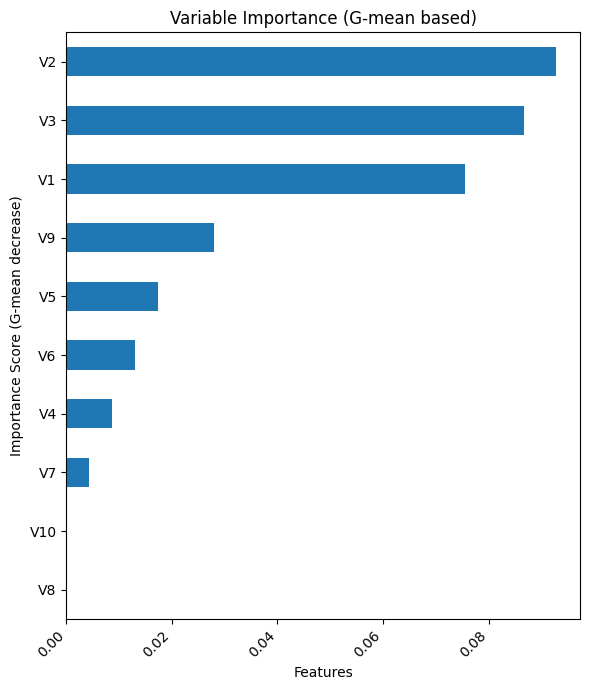

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get variable importance from the results dictionary
var_imp = rfq_model_results['var_imp']

# Convert to a pandas Series for easy plotting and sorting
var_imp_series = pd.Series(var_imp)

# Sort the variable importance for better visualization
sorted_var_imp = var_imp_series.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(6, 7))
sorted_var_imp.plot(kind='barh')
plt.title('Variable Importance (G-mean based)')
plt.xlabel('Features')
plt.ylabel('Importance Score (G-mean decrease)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Random Forests Quantile Classifier (RFQ) in Python

In Python, there is no direct equivalent to R pacakge`randomForestSRC’`s `imbalanced()` function, which implements RFQ for imbalanced data with specific handling of `G-mean` and `AUC` splitting. However, we can approximate this using the quantile_forest library for quantile-based random forests and imblearn for handling imbalanced data, adapting the workflow to match the R code’s functionality. The breast cancer dataset is not directly available in Python, so we’ll use a similar dataset (e.g., sklearn.datasets.load_breast_cancer) and implement RFQ, standard RF, and Balanced Random Forest (BRF) equivalents, along with threshold optimization, performance evaluation, and variable importance (VIMP).

In [22]:
!pip install quantile_forest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.8 MB/s eta 0:00:00


In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from quantile_forest import RandomForestQuantileRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

### Data

The breast dataset from randomForestSRC is replaced with sklearn.datasets.load_breast_cancer, which has 569 samples, 30 features, and a binary target (0 = malignant, 1 = benign). This dataset is less imbalanced (~2:1) than the R dataset (~3.2:1), but it’s a suitable substitute.
Data is split 80/20, and class distributions are printed for verification.

In [24]:
# Load breast cancer dataset (similar to randomForestSRC's breast dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Binary: 0 (malignant), 1 (benign)

# Remove any missing values (if any, though this dataset is clean)
X = X.dropna()
y = y[X.index]

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Verify class distribution
print("Training set class distribution:")
print(pd.Series(y_train).value_counts())
print("Test set class distribution:")
print(pd.Series(y_test).value_counts())

Training set class distribution:
1    284
0    171
Name: count, dtype: int64
Test set class distribution:
1    73
0    41
Name: count, dtype: int64


In [25]:
# Function to calculate G-mean
def gmean_score(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    sensitivity = report['1']['recall']  # True Positive Rate (Recall for positive class)
    specificity = report['0']['recall']  # True Negative Rate (Recall for negative class)
    return np.sqrt(sensitivity * specificity)

### Default RFQ

In [26]:
# RandomForestQuantileRegressor for quantile-based classification
rfq = RandomForestQuantileRegressor(n_estimators=3000, max_depth=None, min_samples_leaf=1, random_state=123)
rfq.fit(X_train, y_train)

RandomForestQuantileRegressor(n_estimators=3000, random_state=123)

In [28]:
# Predict median (quantile=0.5) and convert to class labels
y_pred_quantiles = rfq.predict(X_test, quantiles=[0.5])
threshold_default = 0.5  # Default threshold
y_pred_rfq = (y_pred_quantiles > threshold_default).astype(int)

print("\nDefault RFQ Classification Report:")
print(classification_report(y_test, y_pred_rfq))
print("Default RFQ G-mean:", gmean_score(y_test, y_pred_rfq))


Default RFQ Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Default RFQ G-mean: 0.9809409966408504


### Standard RF with G-mean and AUC-like Optimization

In [29]:
# Use ROC AUC as a proxy for AUC splitting
rf_std_auc = RandomForestClassifier(n_estimators=3000, criterion='gini', random_state=123)
rf_std_auc.fit(X_train, y_train)
y_pred_std_auc = rf_std_auc.predict(X_test)

In [30]:
print("\nStandard RF (G-mean, AUC-like) Classification Report:")
print(classification_report(y_test, y_pred_std_auc))
print("Standard RF G-mean:", gmean_score(y_test, y_pred_std_auc))


Standard RF (G-mean, AUC-like) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Standard RF G-mean: 0.9877295966495896


### Balanced Random Forest (BRF) with Misclassification

In [31]:
# Balanced Random Forest (BRF) with Misclassification-
brf = BalancedRandomForestClassifier(n_estimators=3000, sampling_strategy='auto', random_state=123)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

In [32]:
print("\nBRF (Misclassification) Classification Report:")
print(classification_report(y_test, y_pred_brf))
print("BRF G-mean:", gmean_score(y_test, y_pred_brf))


BRF (Misclassification) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.99      0.97      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

BRF G-mean: 0.9741050875978059


### Threshold Optimization for RFQ

In [36]:
# Optimize threshold to maximize G-mean on training data
y_train_pred_quantiles = rfq.predict(X_train, quantiles=[0.5])
thresholds = np.linspace(0, 1, 100)
gmean_scores = []
for thresh in thresholds:
    y_train_pred = (y_train_pred_quantiles > thresh).astype(int)
    gmean_scores.append(gmean_score(y_train, y_train_pred))
optimal_threshold = thresholds[np.argmax(gmean_scores)]

print("\nDefault Threshold:", threshold_default)
print("Optimized Threshold:", optimal_threshold)


Default Threshold: 0.5
Optimized Threshold: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Evaluate RFQ with optimized threshold
y_pred_rfq_opt = (y_pred_quantiles > optimal_threshold).astype(int)
print("\nRFQ with Optimized Threshold Classification Report:")
print(classification_report(y_test, y_pred_rfq_opt))
print("RFQ Optimized G-mean:", gmean_score(y_test, y_pred_rfq_opt))


RFQ with Optimized Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

RFQ Optimized G-mean: 0.9809409966408504


In [40]:
# 25% and 75% quantiles for training performance
y_train_pred_quantiles_multi = rfq.predict(X_train, quantiles=[0.25, 0.5, 0.75])
print("\nTraining Predicted Quantiles (25th, 50th, 75th):")
print(pd.DataFrame(y_train_pred_quantiles_multi, columns=['Quantile_0.25', 'Quantile_0.5', 'Quantile_0.75']).head())


Training Predicted Quantiles (25th, 50th, 75th):
   Quantile_0.25  Quantile_0.5  Quantile_0.75
0            0.0           0.0            0.0
1            0.0           0.0            0.0
2            1.0           1.0            1.0
3            0.0           0.0            0.0
4            1.0           1.0            1.0


### Variable Importance

In [41]:
# Standard permutation importance for RFQ (no direct blocked VIMP equivalent in Python)
from sklearn.inspection import permutation_importance

# VIMP for RFQ
rfq_importance = permutation_importance(rfq, X_train, y_train, n_repeats=10, random_state=123)
rfq_vimp = pd.DataFrame({'Feature': X.columns, 'RFQ': rfq_importance.importances_mean})

# VIMP for BRF
brf_importance = permutation_importance(brf, X_train, y_train, n_repeats=10, random_state=123)
rfq_vimp['BRF'] = brf_importance.importances_mean

print("\nVariable Importance (VIMP):")
print(rfq_vimp.head())


Variable Importance (VIMP):
           Feature       RFQ       BRF
0      mean radius  0.000000  0.000000
1     mean texture  0.004685  0.004835
2   mean perimeter  0.000000  0.000000
3        mean area  0.000000  0.000000
4  mean smoothness  0.000000  0.000659


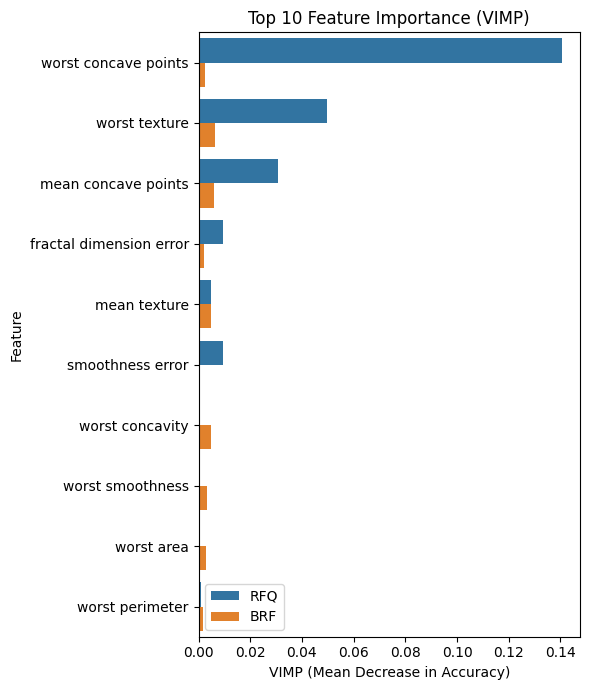

In [43]:
# Calculate mean VIMP and select top 10 features
rfq_vimp['Mean_VIMP'] = rfq_vimp[['RFQ', 'BRF']].mean(axis=1)
top_10_vimp = rfq_vimp.nlargest(10, 'Mean_VIMP')

# Plotting with seaborn
imp_df = pd.melt(top_10_vimp, id_vars=['Feature'], value_vars=['RFQ', 'BRF'], var_name='Model', value_name='VIMP')
plt.figure(figsize=(6, 7))
sns.barplot(x='VIMP', y='Feature', hue='Model', data=imp_df)
plt.title('Top 10 Feature Importance (VIMP)')
plt.xlabel('VIMP (Mean Decrease in Accuracy)')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

## Summary and Conclusion

This notebook explores the concept and implementation of the Random Forests Quantile Classifier (RFQ), a method designed to address class imbalance in classification tasks.

The notebook first introduces the theoretical background of RFQ, explaining its key features, how it works (including bootstrap sampling, weight assignment, conditional probability estimation, and quantile-based classification), its advantages, limitations, and applications. A simplified implementation of the RFQ algorithm from scratch in Python is also presented, including helper functions for calculating Gini impurity, finding the best split, building a decision tree, and making predictions with a single tree. This custom implementation was applied to a simulated dataset resembling the `breast` dataset, and its training and test G-mean, as well as variable importance, were calculated and plotted.

Subsequently, the notebook demonstrates how to use existing Python libraries (`quantile_forest` and `imblearn`) to approximate the RFQ approach using the `sklearn.datasets.load_breast_cancer` dataset. It compares the performance of:

- **Default RFQ**: Using `RandomForestQuantileRegressor` and a default threshold of 0.5.
- **Standard RF**: Using `RandomForestClassifier` (with AUC-like optimization as a proxy).
- **Balanced Random Forest (BRF)**: Using `BalancedRandomForestClassifier` with misclassification criteria.
- **RFQ with Optimized Threshold**: Attempting to optimize the threshold for the `RandomForestQuantileRegressor` based on G-mean on the training data.

The results show that the optimized threshold for the `RandomForestQuantileRegressor` was 0.0, indicating a potential issue with using the quantile predictions directly for this type of thresholding in a binary classification context. In contrast, the Standard RF and BRF models achieved high G-mean scores on this particular dataset, which is less severely imbalanced than the one used in the R vignette.

Variable importance was also calculated using permutation importance for both RFQ (via `quantile_forest`) and BRF models and the top features were visualized.

In conclusion, while a direct equivalent of the `randomForestSRC::imbalanced()` function with its specific G-mean/AUC splitting is not readily available in standard Python libraries, the notebook demonstrates how to build a simplified RFQ from scratch and how to leverage existing libraries like `quantile_forest` and `imblearn` to perform related tasks for imbalanced classification. The experiments highlight the importance of choosing the right tools and understanding their outputs (like the nature of quantile predictions vs. class probabilities) when addressing class imbalance and optimizing metrics like G-mean. For practical applications in Python, `imblearn`'s classifiers are generally more directly suited for handling imbalanced datasets and optimizing metrics like G-mean or AUC by providing accessible probability estimates for thresholding.

## References

1. Ishwaran, H., O’Brien, R., Lu, M., & Kogalur, U. B. (2021). randomForestSRC: Random Forests Quantile Classifier (RFQ) Vignette. http://randomforestsrc.org/articles/imbalance.html[ ](https://www.randomforestsrc.org/articles/imbalance.html)

2.  O’Brien, R., & Ishwaran, H. (2019). A random forests quantile classifier for class imbalanced data. Pattern Recognition, 90, 232–249[ ](https://www.randomforestsrc.org/articles/imbalance.html)

3.  Breiman, L. (2001). Random forests. Machine Learning, 45, 5–32[ ](https://www.randomforestsrc.org/articles/imbalance.html)
